## Final Project

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.optimizers import SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import accuracy_score

In [4]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo: #read in binary mode rb
        dict = pickle.load(fo,  encoding='latin1')
    return dict

def reshape(dataset):
    return np.reshape(dataset, (-1, 3, 32, 32)).transpose((0, 2, 3, 1))

In [5]:
def load_dataset():
    train  = unpickle('./cifar-100-python/train')
    test = unpickle('./cifar-100-python/test')
    meta = unpickle('./cifar-100-python/meta')
    #print(train.keys())
    #print(test.keys())
    #print(meta.keys())
    trainX = train['data']
    trainY = np.array(train['fine_labels'])
    super_trainY = np.array(train['coarse_labels'])

    testX = test['data']
    testY = np.array(test['fine_labels'])
    super_testY = np.array(test['coarse_labels'])

    label_names = meta['fine_label_names']
    super_label_names = meta['coarse_label_names']
    return trainX, trainY, testX, testY

In [6]:
def process_data(trainX, trainY, testX, testY):
    # Pre-Process Data
    trainX = trainX.astype('float32')
    trainX = trainX / 255.0
    trainX = reshape(trainX)
    
    testX = testX.astype('float32')
    testX = testX / 255.0
    testX = reshape(testX)

    
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    #super_trainY = to_categorical(super_trainY, num_classes = 100)
    #super_testY = to_categorical(super_testY, num_classes = 100)

    #print('Train: X=%s, y=%s, super_y=%s' % (trainX.shape, trainY.shape, super_trainY.shape))
    #print('Test: X=%s, y=%s, super_y=%s' % (testX.shape, testY.shape, super_testY.shape))
    return  trainX, trainY, testX, testY
    

In [7]:
# plot first few images
# for i in range(9):
#     plt.subplot(3,3,1+i) # subplot 3 rows, 5 columns, ith subplot
#     plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# plt.show()

In [11]:
# Model 
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Flatten())   
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
    return model
    
def diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')



In [12]:
#def run_test():

trainX, trainY, testX, testY = load_dataset()
trainX, trainY, testX, testY = process_data(trainX, trainY, testX, testY)

model = build_model()
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.2, verbose=1)
# Save Model
print('Saving Model...')

model.save("m1.h5")

Epoch 1/100
625/625 [==============================] - 40s 65ms/step - loss: 4.6055 - accuracy: 0.0109 - val_loss: 4.6038 - val_accuracy: 0.0110
Epoch 2/100
625/625 [==============================] - 43s 69ms/step - loss: 4.6013 - accuracy: 0.0114 - val_loss: 4.5976 - val_accuracy: 0.0164
Epoch 3/100
625/625 [==============================] - 44s 71ms/step - loss: 4.5788 - accuracy: 0.0154 - val_loss: 4.5264 - val_accuracy: 0.0206
Epoch 4/100
625/625 [==============================] - 45s 71ms/step - loss: 4.4986 - accuracy: 0.0207 - val_loss: 4.4460 - val_accuracy: 0.0280
Epoch 5/100
625/625 [==============================] - 46s 73ms/step - loss: 4.4332 - accuracy: 0.0262 - val_loss: 4.3814 - val_accuracy: 0.0325
Epoch 6/100
625/625 [==============================] - 46s 73ms/step - loss: 4.3479 - accuracy: 0.0342 - val_loss: 4.2478 - val_accuracy: 0.0537
Epoch 7/100
625/625 [==============================] - 46s 73ms/step - loss: 4.2650 - accuracy: 0.0465 - val_loss: 4.1647 - val_ac

> 41.670


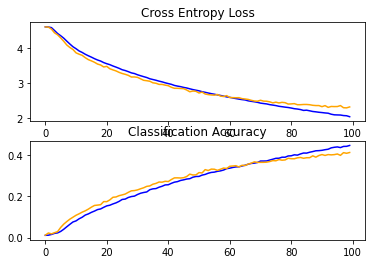

In [39]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
diagnostics(history)

In [32]:
#trainX, trainY, testX, testY = load_dataset()
#trainX, trainY, testX, testY = process_data(trainX, trainY, testX, testY)


In [33]:
#result = model.predict(testX[0])